In [ ]:
# Import libraries
## Basic libs
import pandas as pd
import numpy as np
import warnings
## Building Model
from sklearn import linear_model
from scipy import stats

## Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (7, 7)
plt.style.use('ggplot')


In [ ]:
# Load dataset
from google.colab import files
uploaded = files.upload()


Saving Startups.csv to Startups.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Startups.csv']))


In [ ]:
#Checking missing values
missing_data = df.isnull()
missing_data.head()

,R&D Spend,Profit
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False


In [ ]:
print(df.shape)
df

(50, 2)


,R&D Spend,Profit
0,165349.20,192261.83
1,162597.70,191792.06
2,153441.51,191050.39
3,144372.41,182901.99
4,142107.34,166187.94
5,131876.90,156991.12
6,134615.46,156122.51
7,130298.13,155752.60
8,120542.52,152211.77
9,123334.88,149759.96


In [ ]:
#describtion of data
df.describe()

,R&D Spend,Profit
count,50.000000,50.000000
mean,73721.615600,112012.639200
std,45902.256482,40306.180338
min,0.000000,14681.400000
25%,39936.370000,90138.902500
50%,73051.080000,107978.190000
75%,101602.800000,139765.977500
max,165349.200000,192261.830000


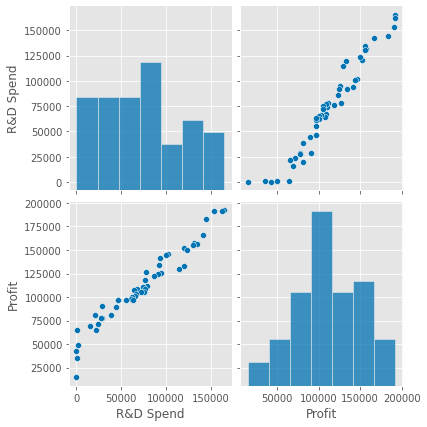

In [ ]:
# Visualize the data using scatter plot and histogram
sns.set_palette('colorblind')
sns.pairplot(data=df, height=3)

In [ ]:
#Fitting linear regression model
lm = LinearRegression()
x = df[['R&D Spend']]
y = df[['Profit']]
lm.fit(x,y)


LinearRegression()

In [ ]:
#Finding correlation between Variables
df[["R&D Spend","Profit"]].corr()

,R&D Spend,Profit
R&D Spend,1.0000,0.9729
Profit,0.9729,1.0000


In [ ]:
# prediction
yhat = lm.predict(x)
yhat[0:5]

array([[190289.29389289],
       [187938.71118575],
       [180116.65707807],
       [172369.00320589],
       [170433.97345032]])

In [ ]:
#Coefficient in Regression Equation
lm.coef_

array([[0.85429137]])

In [ ]:
# Intercept in Regression Equation
lm.intercept_

array([49032.89914125])

(0.0, 205261.30842220932)

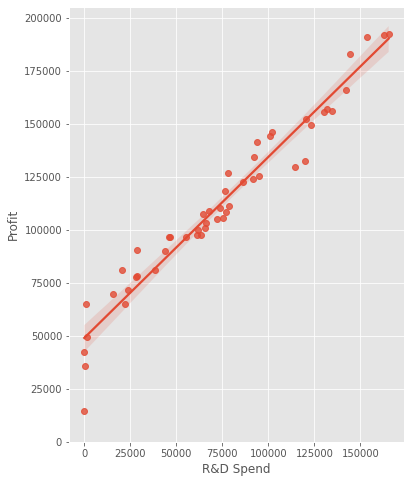

In [ ]:
# Regression Plot
width = 8
height = 6
plt.figure(figsize=(height,width))
sns.regplot(x='R&D Spend', y ='Profit',data = df)
plt.ylim(0,)

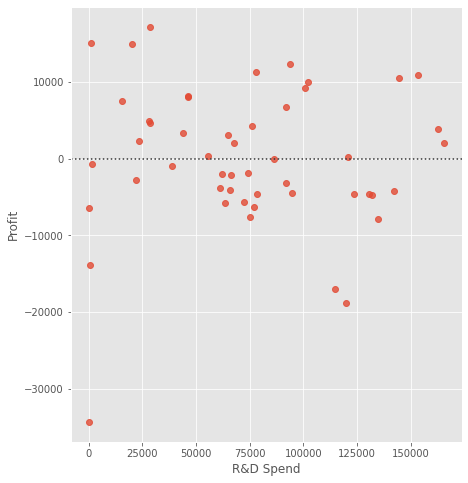

In [ ]:
#Residual Plot
height = 7
width = 8
plt.figure(figsize = (height , width))
sns.residplot(x=df['R&D Spend'] , y =df['Profit'], data=df)
plt.show() 

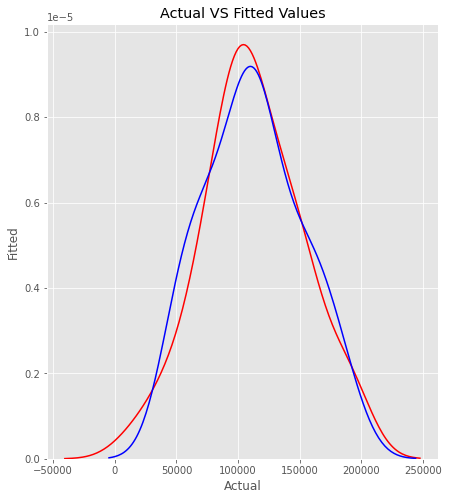

In [ ]:
#Actual Vs Fitted Distribution Plot
y_hat = lm.predict(x)
y_hat
plt.figure(figsize=(height,width))
ax1 = sns.distplot(df['Profit'],hist = False ,color="r" , label ="Actual Value")
sns.distplot(y_hat,hist = False ,color="b" , label ="Fitted Value",ax= ax1)
plt.title("Actual VS Fitted Values")
plt.xlabel("Actual")
plt.ylabel("Fitted")
plt.show()
plt.close()


In [ ]:
#R^2 Value
print("The r square value is:" , lm.score(x,y))

The r square value is: 0.9465353160804393


In [ ]:
#Pearson Coeff And p-value
pearson_val , p_value = stats.pearsonr(df['R&D Spend'],df['Profit'])
print("The pearson coeff is:", pearson_val ,"with p value:",p_value)

The pearson coeff is: 0.9729004656594831 with p value: 3.5003222436905997e-32
